In [1]:
import stdpopsim
import os
import tskit
import msprime
import numpy as np
import subprocess
import matplotlib.pyplot as plt
from IPython.display import display, SVG
import json
import bisect

In [ ]:
#for tskit python API, pleae go to https://tskit.dev/tskit/docs/stable/python-api.html

In [11]:
#load ./trees (a data structure for ARG)
arg1=tskit.load("simulations/Ne2e4_100_1e6/Ne2e4_100_1e6.trees")
print(type(arg1))

<class 'tskit.trees.TreeSequence'>


In [15]:
arg1.num_trees

3759

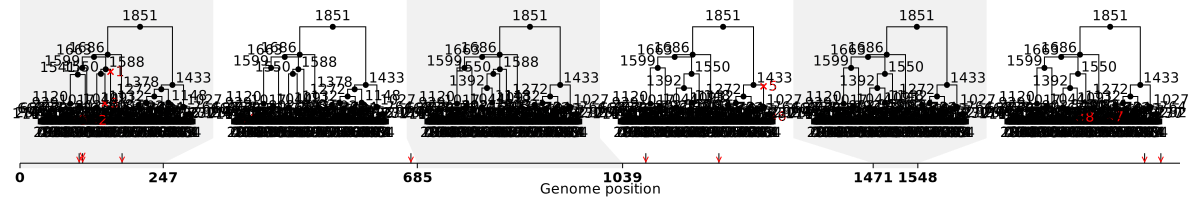

In [9]:
#illustration
display(arg1.simplify().draw_svg(x_lim=[0,2000]))

In [10]:
import dendropy
from Espalier import MAF
def spr_dist_tree(tree1:tskit.Tree,tree2:tskit.Tree):#spr distance bewtween two trees
    #only for tree with 1 root
    if (tree1.num_roots>1 or tree2.num_roots>1):
        return None
    tree1_newick = tree1.as_newick()
    tree2_newick = tree2.as_newick()

    # Parse into dendropy trees
    taxon_namespace = dendropy.TaxonNamespace()
    t1 = dendropy.Tree.get(data=tree1_newick, schema="newick", taxon_namespace=taxon_namespace)
    t2 = dendropy.Tree.get(data=tree2_newick, schema="newick", taxon_namespace=taxon_namespace)


    t1.is_rooted = True
    t2.is_rooted = True

    t1.resolve_polytomies()
    t2.resolve_polytomies()

    if set([leaf.taxon.label for leaf in t1.leaf_node_iter()]) != set([leaf.taxon.label for leaf in t2.leaf_node_iter()]):
        print(f"Tree have mismatched taxa")


    # Now pass dendropy trees to Espalier
    spr_distance = MAF.get_spr_dist(t1, t2)
    return spr_distance
    

#spr distances between trees on arg, given positions
def spr_dist_ts(ts1:tskit.TreeSequence,ts2:tskit.TreeSequence,x1,x2):#x1 and x2 are positions
    assert(len(x1)==len(x2))
    all_dist=[]
    tree1=ts1.at(0)
    tree2=ts2.at(0)
    for i in range(len(x1)):
        tree1.seek(x1[i])
        tree2.seek(x2[i])
        all_dist.append(spr_dist_tree(tree1,tree2))
    return np.array(all_dist)


#kc distances between trees on arg, given positions
def kc_dist_ts(ts1:tskit.TreeSequence,ts2:tskit.TreeSequence,x1,x2):#x1 and x2 are positions on the genome
    assert(len(x1)==len(x2))
    all_dist=[]
    tree1=ts1.at(0,sample_lists=True)
    tree2=ts2.at(0,sample_lists=True)
    for i in range(len(x1)):
        tree1.seek(x1[i])
        tree2.seek(x2[i])
        if (tree1.num_roots>1 or tree2.num_roots>1):
            all_dist.append(None)
        else:
            all_dist.append(tree1.kc_distance(tree2))
    return np.array(all_dist)

def rf_dist_ts(ts1:tskit.TreeSequence,ts2:tskit.TreeSequence,x1,x2):#x1 and x2 are positions on the genome
    assert(len(x1)==len(x2))
    all_dist=[]
    tree1=ts1.at(0,sample_lists=True)
    tree2=ts2.at(0,sample_lists=True)
    for i in range(len(x1)):
        tree1.seek(x1[i])
        tree2.seek(x2[i])
        if (tree1.num_roots>1 or tree2.num_roots>1):
            all_dist.append(None)
        else:
            all_dist.append(tree1.rf_distance(tree2))
    return np.array(all_dist)

In [ ]:
#iterate all trees in ARG (from left to right)
for tree in arg1.trees():
    pass
#tree at position
tree=arg1.at(1000)
#the i-th tree
tree=arg1.at(5) #the 5-th tree from left to right

In [14]:
#convert a tree to newick format (for every tree in ARG)

tree=arg1.at(1000)
newick_tree=tree.newick()
print(newick_tree)

((((29:1506.72499327938658,(25:458.62505243642391,(35:359.28582617360627,(10:203.88256556491146,59:203.88256556491146):155.40326060869481):99.33922626281765):1048.09994084296272):3531.39244618469820,(65:2572.34388688377203,((75:543.14829177549973,82:543.14829177549973):1820.86823461263612,((22:189.55815758778209,64:189.55815758778209):627.86668334522915,(45:514.06356324397166,(31:489.39062162354952,(70:394.72518322018090,84:394.72518322018090):94.66543840336863):24.67294162042214):303.36127768903964):1546.59168545512466):208.32736049563619):2465.77355258031275):7640.78706668088398,(94:8665.09519078643461,(((13:248.97719310617495,(58:83.60309602449892,79:83.60309602449892):165.37409708167604):1654.63202366354767,(72:1188.03099895067794,(67:1023.32710968837841,(48:586.43990922139585,(55:80.15977049121452,81:80.15977049121452):506.28013873018131):436.88720046698256):164.70388926229953):715.57821781904477):4400.79376399842113,((((76:217.52871057884309,96:217.52871057884309):558.73937952856